# Laden der Daten und Inspizieren der Daten (kopiert)

In [1]:
%run ./utils/load_data.ipynb

/home/aie3/flood-area-segmentation/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


No of images:  290
No of masks:  290


(290, 224, 224, 3)
Loaded 290 images and masks.


# Data augmentation


In [2]:
import import_ipynb
from utils.data_augmentation import augment

augmented_images, augmented_masks = augment(images, masks)

print("Dataset size before augmentation: ", images.shape[0])
print("Dataset size after augmentation:", augmented_images.shape[0])

Dataset size before augmentation:  290
Dataset size after augmentation: 1450


# Beispiele aufzeigen

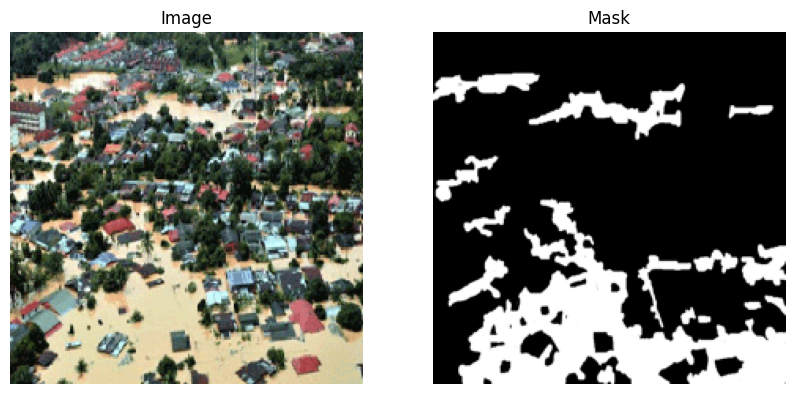

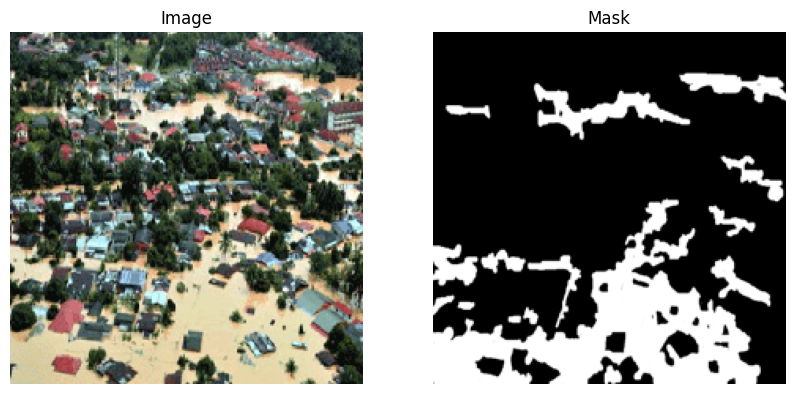

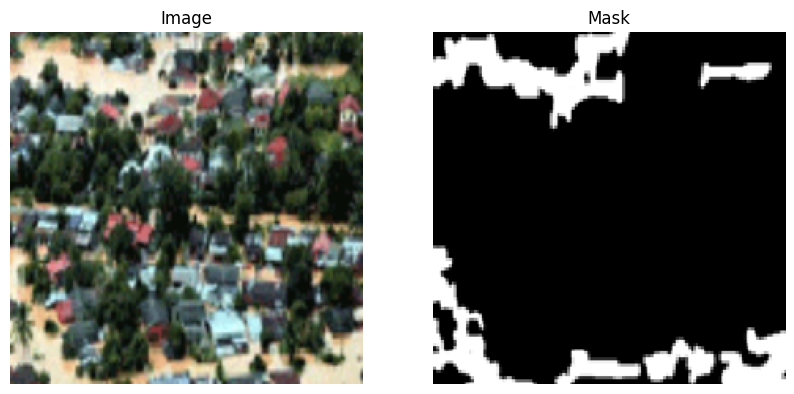

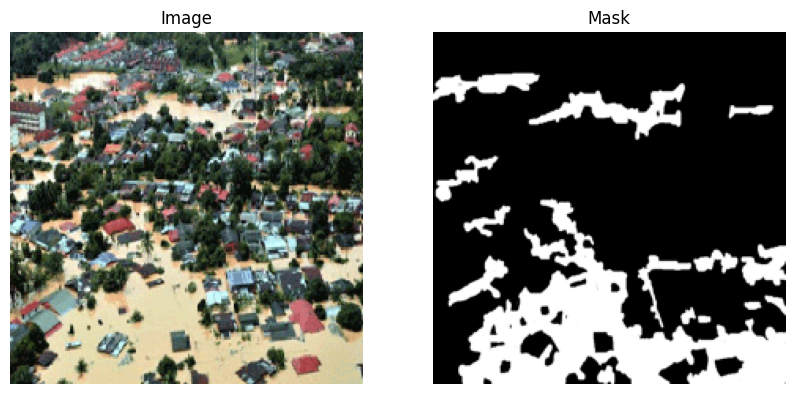

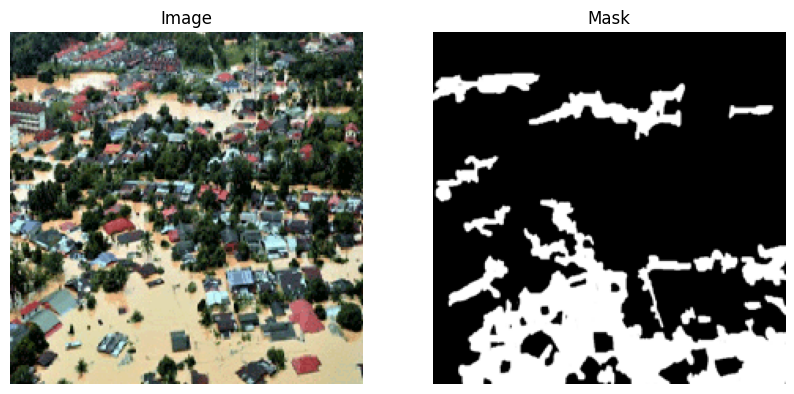

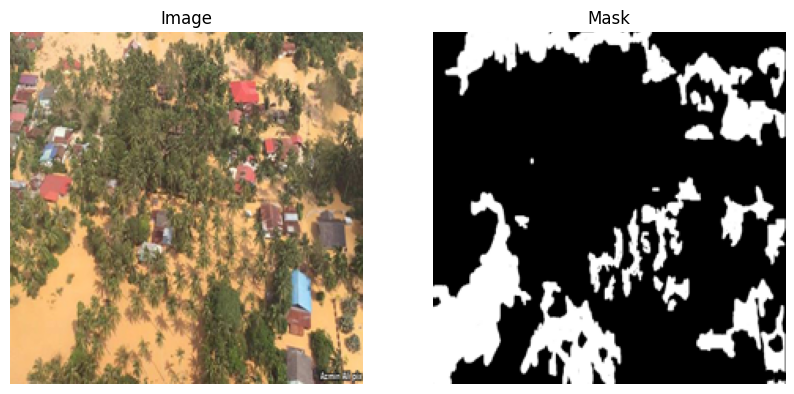

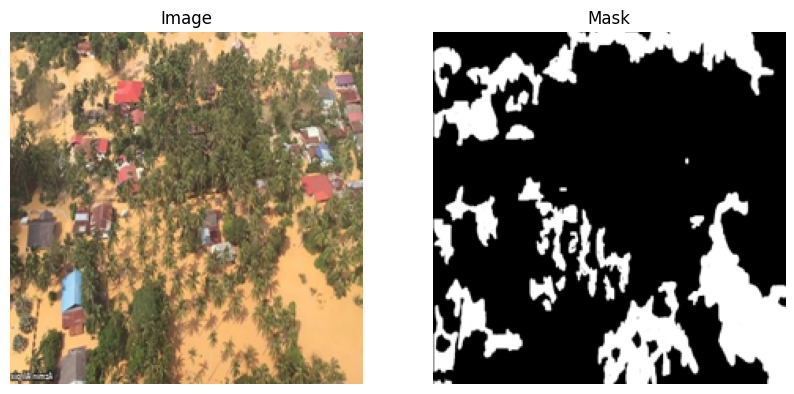

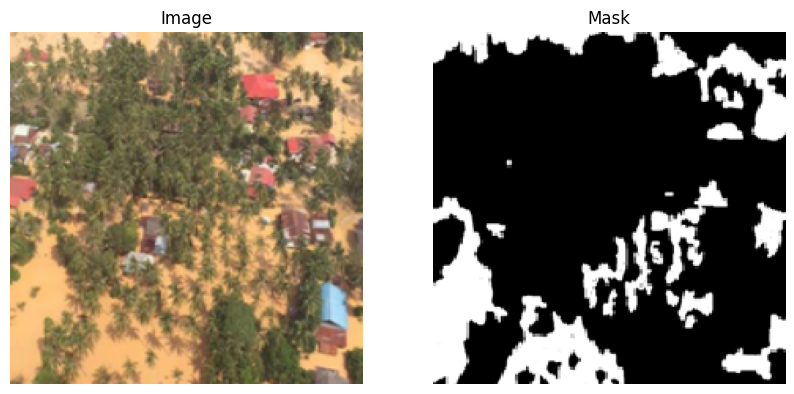

In [3]:
import matplotlib.pyplot as plt

for img, mask in zip(augmented_images[:8], augmented_masks[:8]):
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.title(f"Image")
  plt.imshow(img)
  plt.axis('off')

  plt.subplot(1, 2, 2)
  plt.title(f"Mask")
  plt.imshow(mask, cmap='gray')
  plt.axis('off')

# Model

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(augmented_images, augmented_masks, test_size=0.2, random_state=42)
X_train.shape,X_val.shape

((1160, 224, 224, 3), (290, 224, 224, 3))

In [6]:
import import_ipynb
from utils.iou import iou_metric

2025-06-08 20:33:18.289345: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749414798.305242 4018029 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749414798.310116 4018029 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749414798.322496 4018029 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749414798.322508 4018029 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749414798.322510 4018029 computation_placer.cc:177] computation placer alr

In [7]:
from utils.u_net_v1 import unet_model

model = unet_model((IMG_HEIGHT, IMG_WIDTH, 3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', iou_metric])
model.summary()

I0000 00:00:1749414800.464800 4018029 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 76039 MB memory:  -> device: 0, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:41:00.0, compute capability: 8.0
I0000 00:00:1749414800.467304 4018029 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 79183 MB memory:  -> device: 1, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:61:00.0, compute capability: 8.0
I0000 00:00:1749414800.468529 4018029 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 79183 MB memory:  -> device: 2, name: NVIDIA A100 80GB PCIe, pci bus id: 0000:a1:00.0, compute capability: 8.0


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 224, 224,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 224, 224,  │      2,320 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 112, 112,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 112, 112,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 112, 112,  │      9,248 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 56, 56,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 56, 56,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 56, 56,    │     36,928 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 28, 28,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 28, 28,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 28, 28,    │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 56, 56,    │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 56, 56,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 192)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 56, 56,    │    110,656 │ concatenate[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 56, 56,    │     36,928 │ conv2d_8[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 112, 112,  │          0 │ conv2d_9[0][0]  

 Total params: 487,297 (1.86 MB)

 Trainable params: 487,297 (1.86 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=BATCH_SIZE
)

Epoch 1/30


I0000 00:00:1749414806.120650 4018557 service.cc:152] XLA service 0x7f931c05b140 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749414806.120705 4018557 service.cc:160]   StreamExecutor device (0): NVIDIA A100 80GB PCIe, Compute Capability 8.0
I0000 00:00:1749414806.120711 4018557 service.cc:160]   StreamExecutor device (1): NVIDIA A100 80GB PCIe, Compute Capability 8.0
I0000 00:00:1749414806.120715 4018557 service.cc:160]   StreamExecutor device (2): NVIDIA A100 80GB PCIe, Compute Capability 8.0
2025-06-08 20:33:26.257154: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1749414806.796267 4018557 cuda_dnn.cc:529] Loaded cuDNN version 91001


 5/37 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5424 - iou_metric: 0.1127 - loss: 0.6907

I0000 00:00:1749414817.478874 4018557 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


37/37 ━━━━━━━━━━━━━━━━━━━━ 25s 307ms/step - accuracy: 0.6055 - iou_metric: 0.2563 - loss: 0.6555 - val_accuracy: 0.6539 - val_iou_metric: 0.2282 - val_loss: 0.6793
Epoch 2/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6994 - iou_metric: 0.4974 - loss: 0.5614 - val_accuracy: 0.7616 - val_iou_metric: 0.5830 - val_loss: 0.4576
Epoch 3/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7722 - iou_metric: 0.5842 - loss: 0.4416 - val_accuracy: 0.7100 - val_iou_metric: 0.3595 - val_loss: 0.5401
Epoch 4/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7650 - iou_metric: 0.5659 - loss: 0.4505 - val_accuracy: 0.7119 - val_iou_metric: 0.6076 - val_loss: 0.5359
Epoch 5/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.7530 - iou_metric: 0.5735 - loss: 0.4766 - val_accuracy: 0.7805 - val_iou_metric: 0.6142 - val_loss: 0.4124
Epoch 6/30
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7837 - iou_metric: 0.6150 - loss: 0.4236 - val_accuracy: 0.7867 - val_iou_metri

## Model speichern

In [9]:
model.save('./trained_models/flood_segmentation_model_data_augmented.keras')

# Diagramme

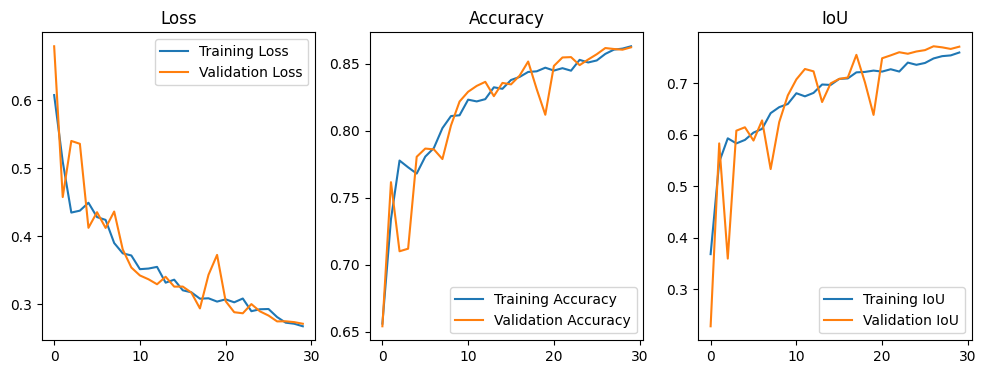

In [10]:
# Plot training history#

# Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

# Accuracy
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Intersection over Union
plt.subplot(1, 3, 3)
plt.plot(history.history['iou_metric'], label='Training IoU')
plt.plot(history.history['val_iou_metric'], label='Validation IoU')
plt.legend()
plt.title('IoU')
plt.show()

In [11]:
print(history.history.keys())

dict_keys(['accuracy', 'iou_metric', 'loss', 'val_accuracy', 'val_iou_metric', 'val_loss'])


# Visualize predictions

In [12]:
from tensorflow.keras.models import load_model

# model = load_model('./trained_models/flood_segmentation_model_data_augmented.keras')
model = load_model('./flood_segmentation_model_data_augmented.keras')

def visualize_predictions(num_images=5):
    preds = model.predict(X_val[:num_images])

    for i in range(num_images):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title("Image")
        plt.imshow(X_val[i])

        plt.subplot(1, 3, 2)
        plt.title("True Mask")
        plt.imshow(y_val[i].squeeze(), cmap='gray')

        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask")
        plt.imshow(preds[i].squeeze(), cmap='gray')

        plt.show()

visualize_predictions()

ValueError: File not found: filepath=./flood_segmentation_model_data_augmented.keras. Please ensure the file is an accessible `.keras` zip file.